In [6]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,summarize)

In [8]:
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
(LinearDiscriminantAnalysis as LDA,
QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [9]:
Smarket = load_data('Smarket')
Smarket

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up
...,...,...,...,...,...,...,...,...,...
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down


In [35]:
# Ange sökvägen till din CSV-fil
csv_fil_sökväg = "ethereum_ohlc.csv"

# Läs in CSV-filen
crypto_data = pd.read_csv(csv_fil_sökväg)

# Visa de första raderna av DataFrame
crypto_data.head(10)


,timestamp,open,high,low,close
0,2023-03-28,18499.0,18580.0,17657.0,17828.0
1,2023-04-01,17802.0,19094.0,17694.0,18931.0
2,2023-04-05,18929.0,19438.0,18385.0,19226.0
3,2023-04-09,19240.0,19932.0,19193.0,19385.0
4,2023-04-13,19386.0,20317.0,19204.0,19843.0
5,2023-04-17,19837.0,22054.0,19663.0,21899.0
6,2023-04-21,21918.0,21918.0,19859.0,20032.0
7,2023-04-25,20025.0,20128.0,18690.0,18873.0
8,2023-04-29,18867.0,20240.0,18587.0,19442.0
9,2023-05-03,19425.0,19890.0,18708.0,19275.0


In [36]:
# Skriv ut antalet rader i DataFrame
print("Antal rader i datasetet:", len(crypto_data))

Antal rader i datasetet: 92


In [25]:
Smarket.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [26]:
crypto_data.columns

Index(['Date', 'Price'], dtype='object')

Har nu fått ihop en csv fil där även volymer finns med genom att koppla ihop två API:er. Jag har kört koden i filen lag.py.

In [29]:
# Ange sökvägen till din CSV-fil
csv_fil_sökväg = "ethereum_combined_data.csv"

# Läs in CSV-filen
crypto_combined_data = pd.read_csv(csv_fil_sökväg)

# Visa de första raderna av DataFrame
crypto_combined_data.head(10)

,timestamp,open,high,low,close,price,total_volumes
0,2023-04-01,17802.0,19094.0,17694.0,18931.0,18930.591628,1.072042e+11
1,2023-04-05,18929.0,19438.0,18385.0,19226.0,19226.136785,1.189786e+11
2,2023-04-09,19240.0,19932.0,19193.0,19385.0,19384.757943,6.252271e+10
3,2023-04-13,19386.0,20317.0,19204.0,19843.0,19843.200760,1.359117e+11
4,2023-04-17,19837.0,22054.0,19663.0,21899.0,21899.279850,9.178568e+10
5,2023-04-21,21918.0,21918.0,19859.0,20032.0,20031.702008,1.280417e+11
6,2023-04-25,20025.0,20128.0,18690.0,18873.0,18872.758935,9.400288e+10
7,2023-04-29,18867.0,20240.0,18587.0,19442.0,19442.136540,9.086059e+10
8,2023-05-03,19425.0,19890.0,18708.0,19275.0,19274.665982,8.590541e+10
9,2023-05-07,19293.0,20383.0,18920.0,19283.0,19283.475850,1.129963e+11


In [31]:
# Skriv ut antalet rader i DataFrame
print("Antal rader i datasetet:", len(crypto_combined_data))

Antal rader i datasetet: 91


I och med att dom olika API:erna har olika intervall av datum som dom ger värden så blir det bara 91 rader vilket känns som ett för litet dataset. Jag tror att jag väljer att utverdera varje dataset för sig i stället. Nedan är hur dataset'et med volym såg ut innan det kombinerades med det tidigare dataset:et. Jag väljer att börja med nedan dataset "ethereum_market_data_subset.csv".

In [33]:
# Ange sökvägen till din CSV-fil
csv_fil_sökväg = "ethereum_market_data_subset.csv"

# Läs in CSV-filen
crypto_market_data_subset = pd.read_csv(csv_fil_sökväg)

# Visa de första raderna av DataFrame
crypto_market_data_subset.head(10)

,timestamp,price,total_volumes
0,2023-03-29,18390.541156,9.886756e+10
1,2023-03-30,18663.820127,1.080555e+11
2,2023-03-31,18571.753863,1.135101e+11
3,2023-04-01,18930.591628,1.072042e+11
4,2023-04-02,18920.009442,6.433921e+10
5,2023-04-03,18740.023847,6.963161e+10
6,2023-04-04,18766.025878,1.154859e+11
7,2023-04-05,19226.136785,1.189786e+11
8,2023-04-06,19903.910848,1.206570e+11
9,2023-04-07,19524.350078,9.602805e+10


In [34]:
# Skriv ut antalet rader i DataFrame
print("Antal rader i datasetet:", len(crypto_market_data_subset))

Antal rader i datasetet: 364


In [37]:
import matplotlib.pyplot as plt

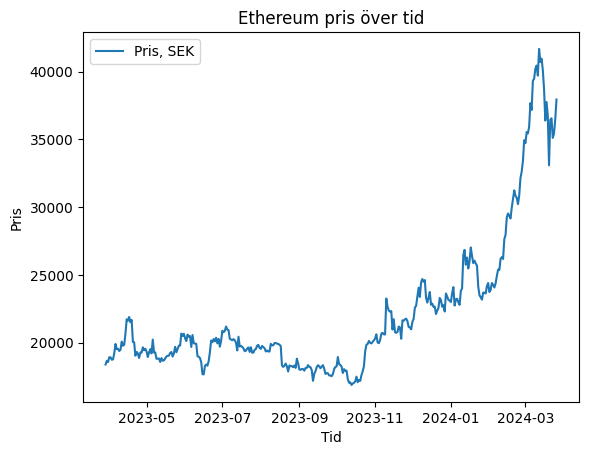

In [63]:
# Plotta datan
plt.plot(crypto_market_data_subset['timestamp'], crypto_market_data_subset['price'], label='Pris, SEK')
plt.xlabel('Tid')
plt.ylabel('Pris')
plt.title('Ethereum pris över tid')
plt.legend()
plt.show()

We compute the correlation matrix using the corr() method for data .corr() frames, which produces a matrix that contains all of the pairwise correlations among the variables

In [43]:
crypto_market_data_subset.corr()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/mnt/c/Users/aras/python_iths/iths_2023_sep_dec/aras_venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_29479/2599672728.py", line 1, in <module>
    crypto_market_data_subset.corr()
  File "/mnt/c/Users/aras/python_iths/iths_2023_sep_dec/aras_venv/lib/python3.11/site-packages/pandas/core/frame.py", line 10707, in corr
  File "/mnt/c/Users/aras/python_iths/iths_2023_sep_dec/aras_venv/lib/python3.11/site-packages/pandas/core/frame.py", line 1892, in to_numpy
    indicates `split`.
         ^^^^^^^^^^^^^^
  File "/mnt/c/Users/aras/python_iths/iths_2023_sep_dec/aras_venv/lib/python3.11/site-packages/pandas/core/internals/managers.py", line 1656, in as_array
  File "/mnt/c/Users/aras/python_iths/iths_2023_sep_dec/aras_venv/lib/python3.11/site-packages/pandas/core/internals/managers.py", line 1715, in _interleave
    for b in self.b

In [45]:
crypto_market_data_subset['timestamp'] = pd.to_datetime(crypto_market_data_subset['timestamp'])

In [47]:
crypto_market_data_subset.head

<bound method NDFrame.head of      timestamp         price  total_volumes
0   2023-03-29  18390.541156   9.886756e+10
1   2023-03-30  18663.820127   1.080555e+11
2   2023-03-31  18571.753863   1.135101e+11
3   2023-04-01  18930.591628   1.072042e+11
4   2023-04-02  18920.009442   6.433921e+10
..         ...           ...            ...
359 2024-03-22  36564.429860   2.576570e+11
360 2024-03-23  35115.982730   2.340057e+11
361 2024-03-24  35438.091943   1.432448e+11
362 2024-03-25  36477.479721   1.346166e+11
363 2024-03-26  37951.952872   2.104689e+11

[364 rows x 3 columns]>

In [48]:
crypto_market_data_subset.corr()

,timestamp,price,total_volumes
timestamp,1.000000,0.708505,0.535112
price,0.708505,1.000000,0.615372
total_volumes,0.535112,0.615372,1.000000


In [52]:
Smarket_correlation_matrix = Smarket.select_dtypes(include=[np.number]).corr()


In [51]:
Smarket_correlation_matrix.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.151492,-0.176849,-0.170135,-0.169663,-0.168492,0.779410,-0.157635
Lag1,-0.151492,1.000000,-0.187069,-0.151566,-0.135183,-0.140235,-0.083981,-0.193227
Lag2,-0.176849,-0.187069,1.000000,-0.168485,-0.135261,-0.120499,-0.241285,-0.144280
Lag3,-0.170135,-0.151566,-0.168485,1.000000,-0.164420,-0.154637,-0.234559,-0.126079
Lag4,-0.169663,-0.135183,-0.135261,-0.164420,1.000000,-0.173795,-0.248411,-0.137138
Lag5,-0.168492,-0.140235,-0.120499,-0.154637,-0.173795,1.000000,-0.198119,-0.200887
Volume,0.779410,-0.083981,-0.241285,-0.234559,-0.248411,-0.198119,1.000000,-0.132657
Today,-0.157635,-0.193227,-0.144280,-0.126079,-0.137138,-0.200887,-0.132657,1.000000


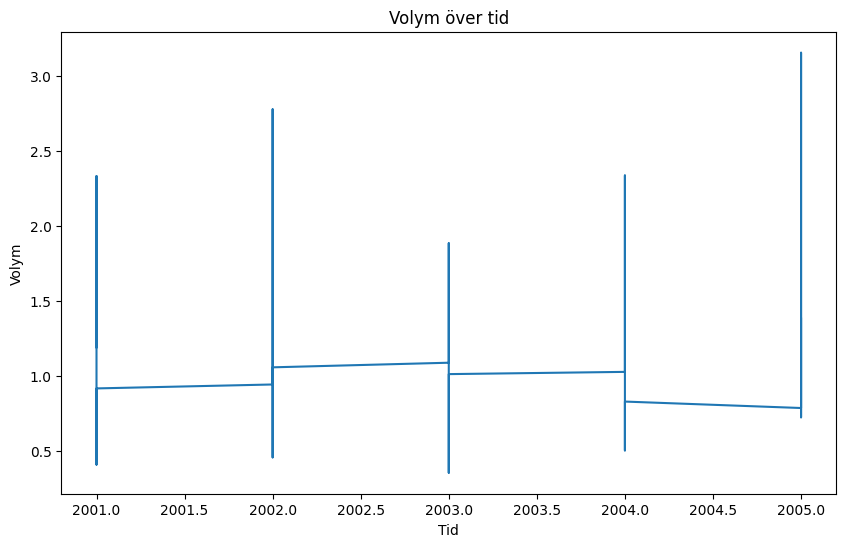

In [85]:
plt.figure(figsize=(10, 6))  # Ange en större figurstorlek
plt.plot(Smarket["Year"], Smarket["Volume"])
plt.xlabel('Tid')
plt.ylabel('Volym')
plt.title('Volym över tid')
plt.savefig('Smarket_volume_over_year.png')  # Spara diagrammet som en bildfil
plt.show()



4.7.2 Logistic Regression
Next, we will ft a logistic regression model in order to predict Direction
using Lag1 through Lag5 and Volume. The sm.GLM() function fts gener- sm.GLM() alized linear models, a class of models that includes logistic regression. generalized Alternatively, the function linear model sm.Logit() fts a logistic regression model directly. The syntax of sm.GLM() is similar to that of sm.OLS(), except that
we must pass in the argument family=sm.families.Binomial() in order to
tell statsmodels to run a logistic regression rather than some other type of
generalized linear model

In [89]:
allvars = Smarket.columns.drop(['Today', 'Direction', 'Year'])
design = MS(allvars)
X = design.fit_transform(Smarket)
y = Smarket.Direction == 'Up'
glm = sm.GLM(y,
X,
family=sm.families.Binomial())
results = glm.fit()
summarize(results)

/mnt/c/Users/aras/python_iths/iths_2023_sep_dec/aras_venv/lib/python3.11/site-packages/ISLP/models/columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:
/mnt/c/Users/aras/python_iths/iths_2023_sep_dec/aras_venv/lib/python3.11/site-packages/ISLP/models/columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:
/mnt/c/Users/aras/python_iths/iths_2023_sep_dec/aras_venv/lib/python3.11/site-packages/ISLP/models/columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels 

,coef,std err,z,P>|z|
intercept,-0.1260,0.241,-0.523,0.601
Lag1,-0.0731,0.050,-1.457,0.145
Lag2,-0.0423,0.050,-0.845,0.398
Lag3,0.0111,0.050,0.222,0.824
Lag4,0.0094,0.050,0.187,0.851
Lag5,0.0103,0.050,0.208,0.835
Volume,0.1354,0.158,0.855,0.392


In [91]:


#  calculated percentage returns

# Calculate percentage returns for Lag1 through Lag5
crypto_market_data_subset['Lag1'] = crypto_market_data_subset['price'].pct_change(periods=1) * 100
crypto_market_data_subset['Lag2'] = crypto_market_data_subset['price'].pct_change(periods=2) * 100
crypto_market_data_subset['Lag3'] = crypto_market_data_subset['price'].pct_change(periods=3) * 100
crypto_market_data_subset['Lag4'] = crypto_market_data_subset['price'].pct_change(periods=4) * 100
crypto_market_data_subset['Lag5'] = crypto_market_data_subset['price'].pct_change(periods=5) * 100

# Drop rows with NaN values (since percentage change cannot be calculated for the first few rows)
LAG_on_price_crypto_market_data_subset = crypto_market_data_subset.dropna()

# Save the DataFrame to a new CSV file
LAG_on_price_crypto_market_data_subset.to_csv('price_data_with_lag1-5.csv', index=False)
